In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [23]:
accidents = pd.read_csv('accident.csv',index_col='accident_index')
vehicles= pd.read_csv('vehicle.csv', error_bad_lines=False,index_col='accident_index',warn_bad_lines=False)
casualties = pd.read_csv('casualty.csv', error_bad_lines=False, index_col='accident_index', warn_bad_lines=False)
print('Loaded')

Loaded


In [24]:
print("accidents")
print("size=",accidents.size)
print(accidents.shape)
accidents.head()

accidents
size= 19685365
(562439, 35)


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
2017010001708,2017,10001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,...,0,4,1,1,0,0,1,1,2,E01001450
2017010009342,2017,10009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,...,0,4,1,2,0,0,1,1,2,E01004702
2017010009344,2017,10009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,...,0,4,1,1,0,0,1,1,2,E01004298
2017010009348,2017,10009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,...,4,4,2,2,0,0,1,1,2,E01001429
2017010009350,2017,10009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,...,5,4,1,2,0,0,1,1,2,E01001808


In [25]:
print("vehicles")
print("size=",vehicles.size)
print(vehicles.shape)
vehicles.head()

vehicles
size= 27959418
(1035534, 27)


,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
accident_index,,,,,,,,,,,,,,,,,,,,,
2017010001708,2017,10001708,1,9,0,18,1,5,0,0,...,1,24,5,1997,2,1,-1,-1,-1,-1
2017010001708,2017,10001708,2,2,0,18,1,5,0,0,...,1,19,4,-1,-1,-1,-1,-1,-1,-1
2017010009342,2017,10009342,1,9,0,18,5,1,0,1,...,1,33,6,1797,8,8,-1,9,1,E01023674
2017010009342,2017,10009342,2,9,0,18,5,1,0,1,...,1,40,7,2204,2,12,-1,2,1,E01004755
2017010009344,2017,10009344,1,9,0,18,3,7,0,1,...,3,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [26]:
print("casualties")
print("size=",casualties.size)
print(casualties.shape)
casualties.head()

casualties
size= 13113738
(728541, 18)


,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
accident_index,,,,,,,,,,,,,,,,,,
2017010001708,2017,010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2,E01001414
2017010001708,2017,010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1,-1
2017010001708,2017,010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1,-1
2017010009342,2017,010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5,E01000589
2017010009344,2017,010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5,E01003756


In [30]:
accidents = accidents.join(vehicles, how='outer', lsuffix='_left', rsuffix='_right')
print("done joining")
print(accidents.shape)

done joining
(1146699, 62)


In [31]:
accidents.columns

Index(['accident_year_left', 'accident_reference_left',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'accident_year_right',
       'accident_reference_right', 'vehicle_reference', 'vehicle_type',
       'to

In [32]:
missing= accidents.isna().sum().sort_values(ascending=False)
missing

longitude                   205089
latitude                    205089
location_easting_osgr       205073
location_northing_osgr      205073
accident_year_left          204830
                             ...  
vehicle_type                111165
vehicle_reference           111165
accident_reference_right    111165
accident_year_right         111165
lsoa_of_driver              111165
Length: 62, dtype: int64

In [33]:
accidents = accidents.dropna()

In [35]:
missing= accidents.isna().sum().sort_values(ascending=False)
missing
accidents.shape

(830454, 62)

#joining the tables

## Identifying Missing Values

In this particular dataset, there are two types of missing values '-1' and 'Nan'. We will invesitigate each column with total missing values.
We will not be imputing any mean or median value since the dataset is big enough to perform analysis.

In [36]:
#accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                #'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)

#combining two columns
accidents['Date_time'] = accidents['date'] +' '+ accidents['time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['date','time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

Our dataset is clean to do some analysis. We would be using very few columns to do analysis since the dataset is fairly large.

# Machine Learning

We will be looking at different columns to figure out predicting about the accidents severity. After we can predict the accident severity, we can make some recommendation to law enforcement for looking into this and be prepared for the future. We can also have more emergency medical services available for those situations.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
print("done")

done


## Spliting the data into training data and test data
We will also consider few features as predictors for machine learning algorithm.

In [38]:
accident_ml = accidents.drop('accident_severity' ,axis=1)
accident_ml = accident_ml[['did_police_officer_attend_scene_of_accident' , 'age_of_driver' ,'vehicle_type', 'age_of_vehicle','day_of_week' , 'weather_conditions' , 'road_surface_conditions'
                          , 'light_conditions', 'sex_of_driver' ,'speed_limit']]

accident_ml.head()

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accidents['accident_severity'].values,test_size=0.20, random_state=99)
print("done")

done


## Random Forest

In [39]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 79.22
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       110
         2.0   0.268786  0.094130  0.139430      1976
         3.0   0.826692  0.947163  0.882837      9463

    accuracy                       0.792190     11549
   macro avg   0.365160  0.347097  0.340756     11549
weighted avg   0.723362  0.792190  0.747233     11549

done


In [40]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 79.22
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       110
         2.0   0.268786  0.094130  0.139430      1976
         3.0   0.826692  0.947163  0.882837      9463

    accuracy                       0.792190     11549
   macro avg   0.365160  0.347097  0.340756     11549
weighted avg   0.723362  0.792190  0.747233     11549

done


In [41]:
#Predict
# sample = [7.0,3.2,4.7,1.4]
# print("done")
# sample.reshape(1, -1)
# result = clf.predict(sample).reshape(1, -1)
# result.reshape(1,-1)



print(accident_ml.head())
print(X_train.shape)
print(X_train[0])
print("done")

                did_police_officer_attend_scene_of_accident  age_of_driver  \
accident_index                                                               
2020370988529                                           1.0           35.0   
2020370988529                                           1.0           29.0   
2020370989057                                           1.0           49.0   
2020370989057                                           1.0           74.0   
2020370989765                                           1.0           38.0   

                vehicle_type  age_of_vehicle  day_of_week  weather_conditions  \
accident_index                                                                  
2020370988529            9.0            14.0          1.0                 2.0   
2020370988529            9.0             9.0          1.0                 2.0   
2020370989057            9.0             2.0          7.0                 1.0   
2020370989057            9.0            20.0    

In [42]:
Y_pred = random_forest.predict(X_test[365].reshape(1, -1))
print(Y_pred)

[3.]


## Logistic Regression 

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
     digits=6,
     y_true=y_test, 
     y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 81.94
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       110
         2.0   0.000000  0.000000  0.000000      1976
         3.0   0.819378  1.000000  0.900723      9463

    accuracy                       0.819378     11549
   macro avg   0.273126  0.333333  0.300241     11549
weighted avg   0.671381  0.819378  0.738033     11549



Predicted,3.0,All
Actual,,
1.0,110,110
2.0,1976,1976
3.0,9463,9463
All,11549,11549


In [46]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(digits=6, y_true=y_test, y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
# Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 70.36
              precision    recall  f1-score   support

         1.0   0.039062  0.045455  0.042017       110
         2.0   0.219202  0.253036  0.234907      1976
         3.0   0.833807  0.805347  0.819330      9463

    accuracy                       0.703611     11549
   macro avg   0.364024  0.367946  0.365418     11549
weighted avg   0.721081  0.703611  0.711934     11549



Predicted,1.0,2.0,3.0,All
Actual,,,,
1.0,5,30,75,110
2.0,32,500,1444,1976
3.0,91,1751,7621,9463
All,128,2281,9140,11549


# Hyperparameters tuning for the models


### Logistic Regression with Hyperparameter tuning


In [47]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=3, random_state=0,multi_class='multinomial')
# # Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test,     y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 81.94
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       110
         2.0   0.000000  0.000000  0.000000      1976
         3.0   0.819378  1.000000  0.900723      9463

    accuracy                       0.819378     11549
   macro avg   0.273126  0.333333  0.300241     11549
weighted avg   0.671381  0.819378  0.738033     11549



Predicted,3.0,All
Actual,,
1.0,110,110
2.0,1976,1976
3.0,9463,9463
All,11549,11549


### Decision Tree hyperparameters tuning

All we are going to do is find the best values for mininum sample leaf and maximum features to get the best score.

In [48]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=12, max_features=4)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
     y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
# ### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 81.0
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       110
         2.0   0.326870  0.059717  0.100984      1976
         3.0   0.825617  0.976118  0.894581      9463

    accuracy                       0.810027     11549
   macro avg   0.384162  0.345278  0.331855     11549
weighted avg   0.732419  0.810027  0.750279     11549



Predicted,2.0,3.0,All
Actual,,,
1.0,17,93,110
2.0,118,1858,1976
3.0,226,9237,9463
All,361,11188,11549


###  Random Forest Hyperparameter tuning
First, we will see the default parameters of the random forest model before we tune the parameters.

In [0]:
random_forest.get_params()

We will implement the grid search using sklearn library. 

In [49]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [4, 5],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [8, 10, 12],
   'n_estimators': [100, 200, 300]
}
# # Create a based model
random_f = RandomForestClassifier()
# # Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = random_f, param_distributions = param_grid,cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [4, 5],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

## Feature importance
We can use Sklearn's random forest library to find out the most important features. We will be plotting in  ascending order so we know what features are most important to predict the accident severity.

<AxesSubplot:>

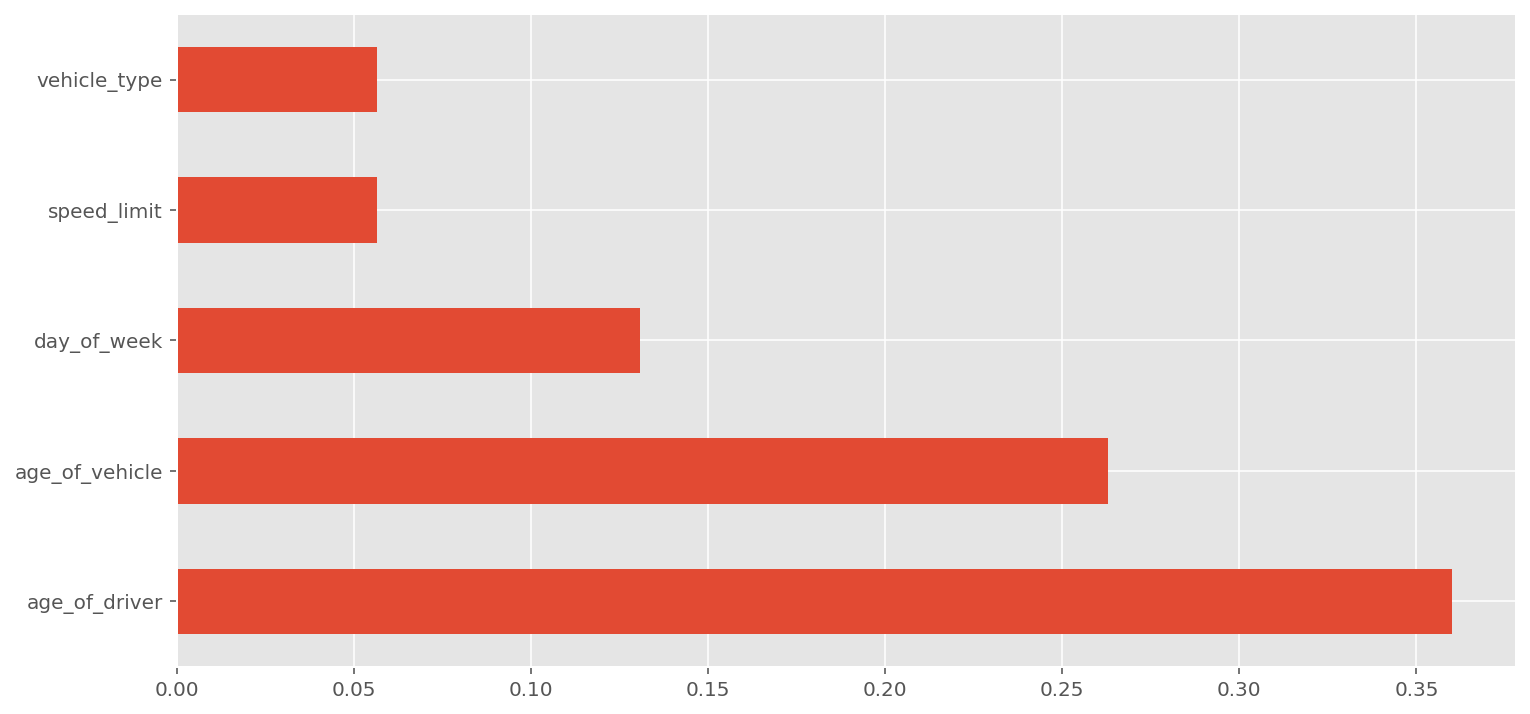

In [50]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [51]:
Y_pred = grid_search.predict(X_test)
acc_random_forest1 = round(grid_search.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test,      y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 82.02
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       110
         2.0   0.504587  0.027834  0.052758      1976
         3.0   0.823164  0.995139  0.901019      9463

    accuracy                       0.820158     11549
   macro avg   0.442584  0.340991  0.317926     11549
weighted avg   0.760816  0.820158  0.747302     11549



Predicted,2.0,3.0,All
Actual,,,
1.0,8,102,110
2.0,55,1921,1976
3.0,46,9417,9463
All,109,11440,11549
